In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score

import joblib


In [2]:
df = pd.read_csv("68544eadb00637051626.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()


,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [3]:
X = df[[col for col in df.columns if col.startswith("sensor")]]
y = df[["parcel_0", "parcel_1", "parcel_2"]]


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
model = MultiOutputClassifier(rf)
model.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [6]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       256
           1       0.92      0.96      0.94       304
           2       0.98      0.46      0.62        87

   micro avg       0.91      0.88      0.89       647
   macro avg       0.93      0.78      0.82       647
weighted avg       0.91      0.88      0.88       647
 samples avg       0.82      0.79      0.79       647

Overall Accuracy: 0.72


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
joblib.dump(model, "irrigation_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

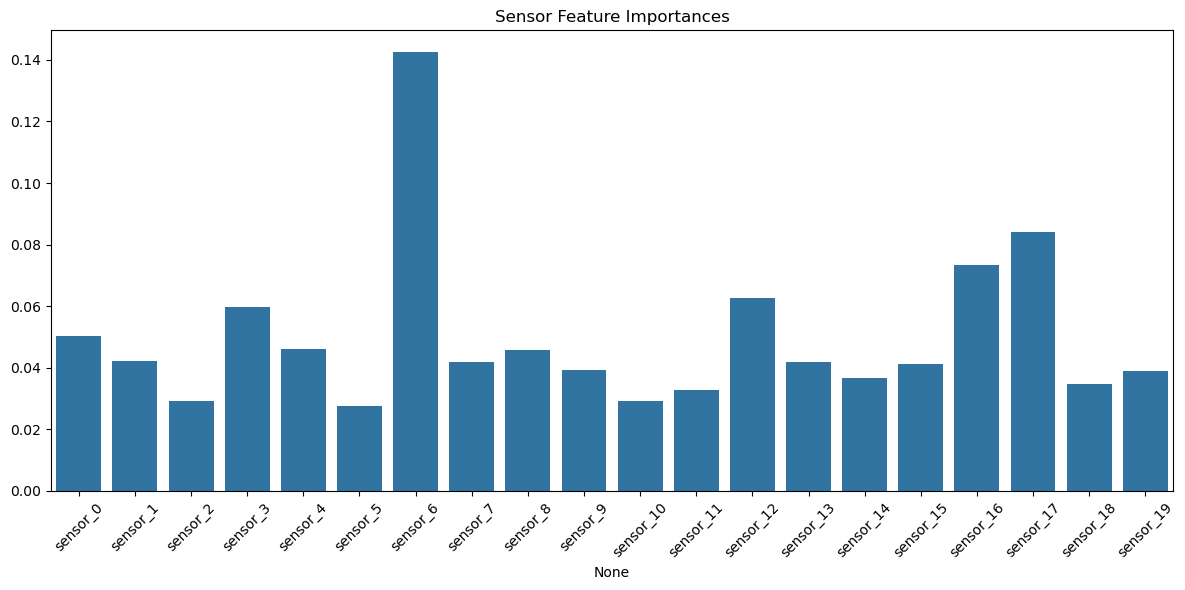

In [8]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in model.estimators_[0].estimators_
], axis=0)

plt.figure(figsize=(12, 6))
sns.barplot(x=X.columns, y=feature_importances)
plt.xticks(rotation=45)
plt.title("Sensor Feature Importances")
plt.tight_layout()
plt.show()


In [9]:
def predict_irrigation(sensor_values):
    data = scaler.transform([sensor_values])
    prediction = model.predict(data)
    return prediction
sample_input = X.iloc[0].tolist()
predict_irrigation(sample_input)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0, 1, 0]])